Just  click on the cell below if you want to see the images in codeblocks that say "Image(...)".

In [1]:
from IPython.display import Image
import os

##  Lecture 5

### Learning objectives

- Learn about functions.
- Learn about documention Python functions via _docstrings_.
- Learm about the scope of variables.
- Discover the joys of modules.

### Code re-use

You can imagine that there are many bits of code that you'll want to use over and over again. For example, in Python the trigonometry functions require radians, but we Earth Scientists typically think in terms of degrees. It would be helpful to convert back and forth between degrees and radians.  Or,  you might want to  find the great circle distance between two points on Earth, or convert between Universal Transverse Mercator (UTM - a special map projection with units of meters) and the more familiar latitude and longitude coordinates. This is where Python _functions_ are come in handy.  You can define a bit of code, assign it a name and a list of input arguments, and then keep re-using it anytime you  like.  Or, you can save it to a file in your Python code directory (see Lecture 1) and import it into any notebook or command line script any time you like.  

We've already used _built-in functions_, for example `list()`, which takes a list generator as an argument and then makes an actual `list` out of it.  Now it is time to learn how to write your own functions.  

The most common structure of a  Python function is to supply some input (IN), do something to the input (RULE), then return the output (OUT).  

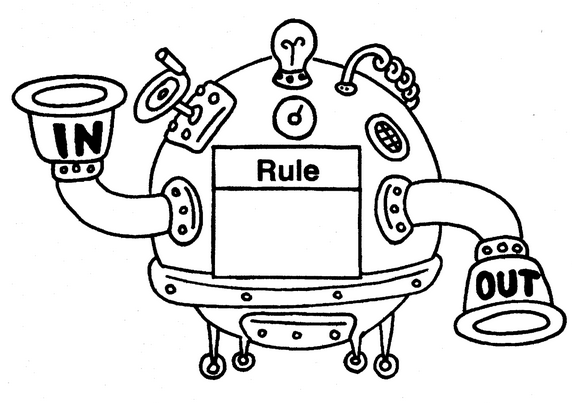

In [2]:
Image('Figures/function-machine.png')

_Figure from:_ https://www.google.com/search?q=the+function+machine&safe=active&client=firefox-b-1-ab&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjVks-88YTgAhUIjFQKHQVPApYQ_AUIDigB&biw=1155&bih=937&dpr=1#imgrc=QpP0BPO8PBd4PM:

Here is an example of a Python function:

In [3]:
def func_name(in_args):  
    """   
    DOC STRING    
    """
    
    out_args = in_args # ok - not very fancy....   
    
    return out_args

### Line by line analysis

We will dissect the following statement
```python
def func_name(in_args):`
```
    
`def`     
- the first line of a function must have `def` as the first three letters, it indicates to Python that you're defining a function.

`func_name`  
- `def` must be followed by the name of the function, here `func_name`.

`in_args`
- This is the equivalent of the left 'arm' of the function in the cartoon, labelled 'IN'.  The objects in the parentheses are called _arguments_. One or more arguments can be passed to the function when it's called and are specified between the parentheses. In this example, `in_args` (a single variable) is passed to the function `func_name`. In general,  input arguments can varying from nothing (no arguments at all), e.g., `func_name()`, to many comma separated variables, e.g., `func_name(variable_1, variable_2, variable_3)`.  It is also possible to have optional variables, but we will get to that later.   

`:`
- The first line of a function always ends with a terminal colon.

___________________________

Next we have
 
```python
    """
    DOC STRING
    """
```


The line or lines between the triple quotes right after the function definition line is a Python _docstring_.  Here you write a description of what the function does, which can be accessed later by using the by now familiar `help()` function. 

Executing `help(func_name)` will print out the doc string.  

Make a habit of using the doc string to explain what the function does. It is most helpful to have an explanation of what the input arguments are (type of object and what it is for) and what the returned objects are.  
___________________________


Next comes the body of the function. In our example this was simply `out_args = in_args`.

___________________________

Lastly there is an optional `return` statement that can return the results of whatever the function did.



In [4]:
help(func_name)

Help on function func_name in module __main__:

func_name(in_args)
    DOC STRING



### The Python _docstring_

Although you can certainly write functional code without a document string, make a habit of always including one.  Trust me - you'll be glad you did and anyone using your code will be super grateful for any hints you give.  The __docstring__ briefly describes what the code does; weeks after you've written your code, it will remind you of what you did.  In addition, you can use it to print out a help message that lets others know what the program does.  You should define what the input and output variables are and what the function does. I like the form: 

```python
"""
This function doesn't do much.

Parameters:
-----------
in_args : str
    The input string.
    
Returns: 
--------
out_args : str
    The output string (in this case the same as the input string).
"""
```

To make this point a little more clearly, you will __LOSE POINTS ON YOUR HOMEWORK IF YOU DO NOT PUT DOCSTRINGS INTO YOUR FUNCTIONS__.  Ok, that is a bit hard ball, but it will help you make good programming habits.  


Notice the use of the triple quotes before and after the documentation string - this means that you can write as many lines as you want.  

### Function body
This is equivalanet to the body of the cartoon function labeled 'RULE'.   This part of the function code must be indented, just like in a `for` loop, or other blocks of code. The code can be as simple as `pass` which does nothing.  Our example function just assigns the variable `in_args` to a new variable name `out_args`.
 
### Return statement

  Python separates the input and output arguments. Incoming arguments are passed in through the `def` statement (`in_args` in the example function) and returning arguments get shipped out with the `return` statement, which is the equivalent of the 'OUT' arm in our cartoon function.   In the example function, `out_args` gets returned to the caller.  
  
So, let's try it out: 


In [5]:
# This calls the function with the input variables, in_args
print(func_name('Four'))

# or alternatively: 

returned_value = func_name('Four')
print(returned_value)

Four
Four


 There are many more sophisticated possibilities, but for now, here is a simple one with no input arguments, and just a `return` statement:

In [6]:
def gimme_pi():  # define the function
    """
    Returns the value of pi.
    
    Parameters:
    -----------
        None
        
    Returns:
    --------
       The value of pi.
    """
    
    return 3.141592653589793

print(gimme_pi())

twoPi = 2 * gimme_pi()
print(twoPi)

3.141592653589793
6.283185307179586


And let's try out the help function for more practice:

In [7]:
help(gimme_pi)

Help on function gimme_pi in module __main__:

gimme_pi()
    Returns the value of pi.
    
    Parameters:
    -----------
        None
        
    Returns:
    --------
       The value of pi.



### Passing arguments

There are three different ways to pass arguments into a function:

1)  You could use a fixed number of arguments.

This function has only one argument:


In [8]:
def degrees_to_radians(degrees):  
    """
    Converts degrees to radians.
    
    Parameters:
    -----------
    degrees : float
        Degrees to convert to radians.
            
    Returns:
    --------
    radians : float
        Degrees converted to radians.
    """
    
    radians = degrees * gimme_pi() / 180.0
    return radians
print('42 degrees in radians is:', degrees_to_radians(42))

42 degrees in radians is: 0.7330382858376184


2) Another way to pass arguments is with a variable number of input arguments.  Functions that accept a variable number of arguments are called _variadic functions_.
You do this by putting `*args` at the end of the list of required arguments if any.

In [9]:
def print_args(*args):
    """
    Prints argument list.
    
    Parameters:
    -----------
    *args : A tuple of input arguments.
        
    Returns: 
    --------
    None
    """
    
    print(args)  # args is a tuple that you can step through (like a list)
    print('You sent me these arguments:')
    for arg in args: # Steps through the argument tuple
        print(arg)
        
print_args(1, 4, 'hi there')
print_args(42)

(1, 4, 'hi there')
You sent me these arguments:
1
4
hi there
(42,)
You sent me these arguments:
42


Notice how the arguments are actually passed as a tuple....   (One very common use of tuples).  

3) Another way to pass in arguments is to use any number  of keyword-value pairs.  This is done by putting `**kwargs` as the last argument in the argument list. `**kwargs` stands for key word arguments and is treated like a **dictionary** in the function.  




In [10]:
def print_keyword_arguments(**kwargs):
    """
    Prints keyword argument list.
    
    Parameters:
    -----------
    **kwargs : dict
        Input dictionary of arguments.
            
    Returns:
    --------
    None
    """
    
    print(kwargs) # kwargs is a dictionary with key:value pairs
    for key in kwargs:
        print(key, kwargs[key])
    
print_keyword_arguments(arg1 = 'spam', arg2 = 42, arg3 = 'ocelot')
# ocelot is another Monty Python joke about Brian (from Life of Brian) trying to 
# sell "Larks' tongues, Otters' noses and Ocelot spleens. Yummy. 

{'arg1': 'spam', 'arg2': 42, 'arg3': 'ocelot'}
arg1 spam
arg2 42
arg3 ocelot


### Main program as a function
 
 It is considered good Python style to treat your main program block as a function too.  This helps with using the document string as a help function and building program documentation in general.  In any case, I recommend that you just start doing it that way too.  In this case,  we have to call the main program with the final (not indented) line 
```python
main()
```

See how it is done in the following: 

In [11]:
def print_keyword_arguments(**kwargs): # same function as before
    """
    Prints keyword argument list.
    
    Parameters:
    -----------
    **kwargs : dict
        Input dictionary of arguments.
            
    Returns:
    --------
    None
    """
    
    for key in kwargs:
        print (key, kwargs[key])  

def main(): # new function called "main"
    """
    Calls function print_kwargs().
    """
    print_keyword_arguments(arg1='spam', arg2=42, arg3='ocelot')
    
main()  # runs the main program

arg1 spam
arg2 42
arg3 ocelot



Notice how all the functions precede the `main()` function. This is because Python is not compiled and executes things in order. All of the functions and variables must be defined before they're called, otherwise the interpreter won't recognize them.  

You may wonder how we've called functions (e.g., `str()`, `int()`, and `float()`) that we did not define in our script. These are more _built in_ Python functions that are accessible to every Python script.

### Modules

What if you wanted to use functions that are defined in a different script written either by future you or by some other helpful soul?

You can define many functions in a separate script (a file with the extension `.py`) called a `module`, and `import` that script into your current script.  Then you can call those functions in the module from within your program.

So let's say I put some functions in a file called 
`my_funcs.py`.  To do this, we can use the `%%writefile` magic Jupyter notebook command you learned about in Lecture 1. 

In [12]:
%%writefile my_funcs.py
## module my_funcs

def gimme_pi():  
    """
    Returns the value of pi.
    
    Parameters:
    -----------
    None
        
    Returns:
    --------
    The value of pi.
    """
    
    return 3.141592653589793

def degrees_to_radians(degrees):  
    """
    Converts degrees to radians.
    
    Parameters:
    -----------
    degrees : float
        Degrees to convert to radians.
            
    Returns:
    --------
    radians : float
        Degrees converted to radians.
    """
    
    radians = degrees * 3.141592653589793 / 180.0
    return radians

def print_args(*args):
    """
    Prints argument list.
    
    Parameters:
    -----------
    *args : A tuple of input arguments.
        
    Returns: 
    --------
    None
    """
    
    print('You sent me these arguments:')
    for arg in args:
        print(arg)


Writing my_funcs.py


By the way, there are many so-called _magic_ commands available in a Jupyter notebook.  For a complete list, just type:

In [13]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

Now you can `import my_funcs`, which will make all your hard work available to you in your notebook. To call a particular function, use the syntax `module_name.function_name()`.
Here is an example:

In [14]:
import my_funcs # This will import your module (i.e. the contents of the file my_funcs.py)
my_funcs.gimme_pi() # This calls the gimme_pi() function defined in the module my_funcs.

3.141592653589793

And some other things become possible like getting the document string. You can use `help()` as before, or you can get the docstring this way:

In [15]:
print(my_funcs.print_args.__doc__) # Note that the __ is actually two underscores - not one


    Prints argument list.
    
    Parameters:
    -----------
    *args : A tuple of input arguments.
        
    Returns: 
    --------
    None
    


**TIP:**  One thing that you might want to do is modify a module you are writing and then re-import it. This used to be possible with a _built-in_ function `reload()`. But now we have to import `reload` from the module `importlib` like this: 

In [16]:
from importlib import reload

Now you can change your `my_funcs.py` module and reload it like this: 

In [17]:
%%writefile my_funcs.py
## module my_funcs

def gimme_pi():  
    """
    Returns the value of pi.
    """
    
    return 3.141592653589793

def degrees_to_radians(degrees):  
    """
    Converts degrees to radians.
    """
    
    return degrees * 3.141592653589793 / 180.0

def print_args(*args):
    """
    Prints out argument list.
    """
    
    print ('The arguments were:')
    for arg in args:
        print(arg)

Overwriting my_funcs.py


In [18]:
reload(my_funcs)
help(my_funcs.gimme_pi)

Help on function gimme_pi in module my_funcs:

gimme_pi()
    Returns the value of pi.



### Scope of variables

Inside a function,  variable names have their own meaning  which in many cases will be different from outside the calling function.  So,  variables names declared inside a function stay in the function.  

  


In [19]:
def LasVegas():
    V = 123
    
def main():
    LasVegas()
    print(V)
    
main()

NameError: name 'V' is not defined

What happened in `LasVegas()` stayed in `LasVegas()` because `V` was defined in the function and doesn't exist outside.

This is true unless you declare a variable to be _global_. Then it is known outside the function.   

Here is an example in which the main program "knows" about the function's variable `V`. 

In [20]:
def SanDiego():
    global V
    V = 123
    
def main():
    SanDiego()
    print(V)
    
main()

123


Oops - what happened in `SanDiego()` didn't stay in `SanDiego()`.

In addition to writing your own functions, modules, and programs, Python has many _built-in_ functions and modules that you can import. We already encountered a few _built in_ functions (for example `int()`) but there are many more.  And there are many more `modules` which we will use shortly. We'll spend the quarter exploring some of these modules, which provide objects and methods for: plotting; linear algera; trig. functions; image manipulation; machine learning algorithms; creating animations and more. 

In [21]:
# a little housekeeping
os.remove('my_funcs.py')